<a href="https://colab.research.google.com/github/JuanMartinez04/Sa-alesySistemas/blob/main/Punto_2_5_Taller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Por favor ingrese el Indice de modulacion el cual desea aplicar para las señales --> 50


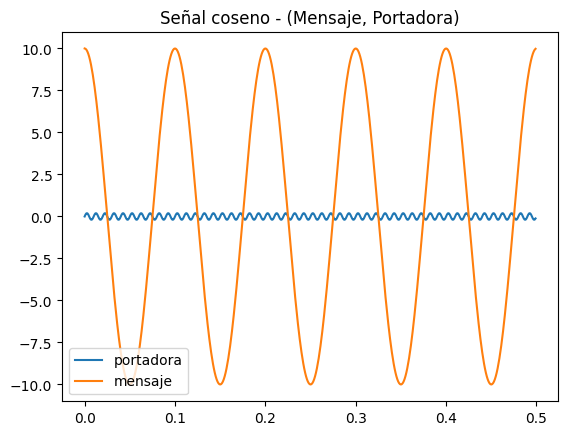

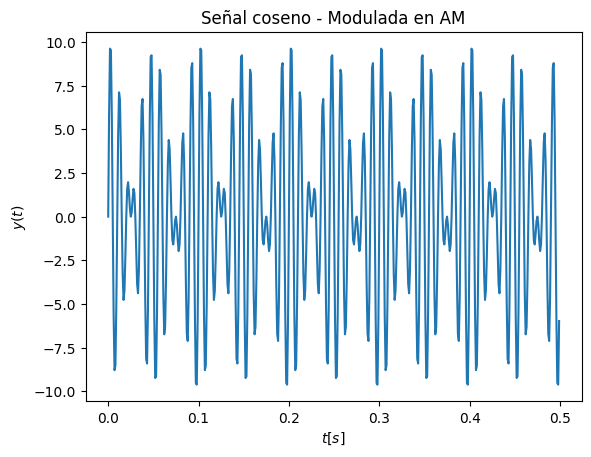

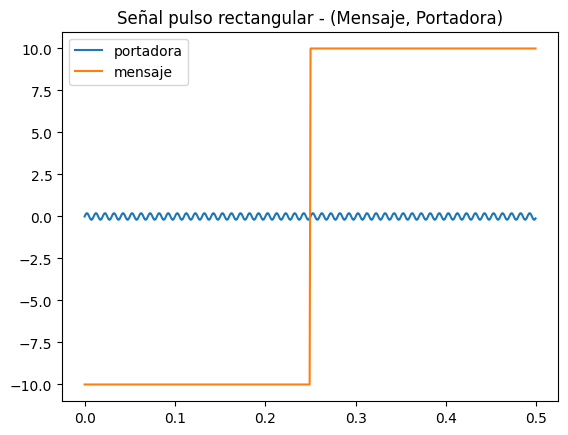

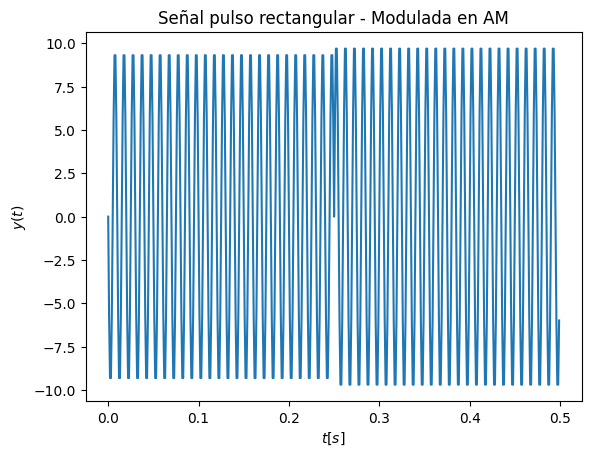

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#Frecuencia portadora y muestreo

Fc = 100 # frecuencia de portadora

Fm = 10 # frecuencia del mensaje
Am = 10 # amplitud del mensaje


ti = 0
tf = 5/Fm # cantidad de periodos a graficar

Fs = 10*Fc # frecuencia muestreo

t = np.arange(ti,tf,1/Fs) # vector del tiempo


Im1 = input('Por favor ingrese el Indice de modulacion el cual desea aplicar para las señales --> ') # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im

Im = float(Im1)

'''Señal coseno'''

m_cos = Am*np.cos(2*np.pi*Fm*t) # mensaje

Ac = max(abs(m_cos))/Im # amplitud de la portadora según índice de modulación
carrier = Ac*np.sin(2*np.pi*Fc*t) #portadora

plt.title('Señal coseno - (Mensaje, Portadora)')
plt.plot(t,carrier,label='portadora')
plt.plot(t,m_cos,label='mensaje')
plt.legend()
plt.show()

y_cos = (1+m_cos/Ac)*carrier #señal modulada en AM

plt.title('Señal coseno - Modulada en AM')
plt.plot(t,y_cos)
plt.xlabel('$t[s]$')
plt.ylabel('$y(t)$')
plt.show()

'''Señal pulso rectangular'''

Ciclo_tra = 0.5 # ciclo de trabajo de la señal rectangular
m_rect = Am*np.ones_like(t)
m_rect[:int(len(t)*Ciclo_tra)] = -Am # mensaje

Ac_rect = max(abs(m_rect))/Im # amplitud de la portadora según índice de modulación
carrier_rect = Ac*np.sin(2*np.pi*Fc*t) #portadora

plt.title('Señal pulso rectangular - (Mensaje, Portadora)')
plt.plot(t,carrier,label='portadora')
plt.plot(t,m_rect,label='mensaje')
plt.legend()
plt.show()

y_rect = (1+m_rect/Ac)*carrier #señal modulada en AM

plt.title('Señal pulso rectangular - Modulada en AM')
plt.plot(t,y_rect)
plt.xlabel('$t[s]$')
plt.ylabel('$y(t)$')
plt.show()



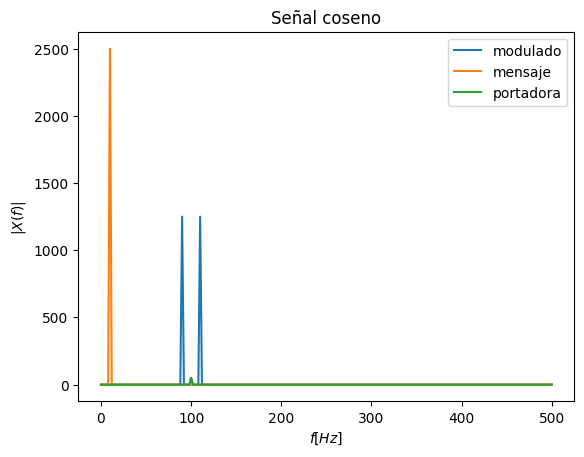

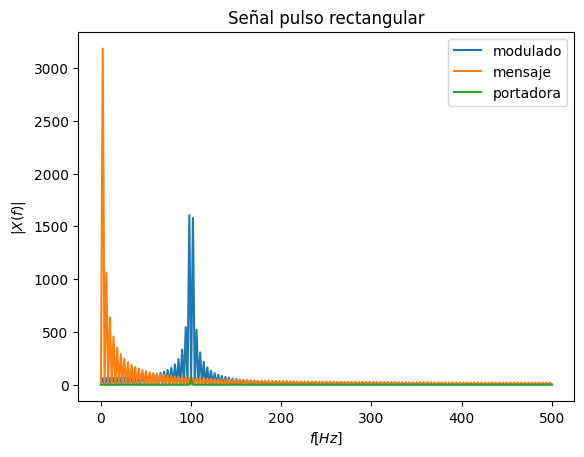

In [ ]:
#En frecuencia

Xfc = np.fft.rfft(carrier)
Xfm = np.fft.rfft(m_cos)
Xfy = np.fft.rfft(y_cos)

Xfc_rect = np.fft.rfft(carrier_rect)
Xfm_rect = np.fft.rfft(m_rect)
Xfy_rect = np.fft.rfft(y_rect)

vfre = np.fft.rfftfreq(len(carrier),1/Fs) 
vfre_rect = np.fft.rfftfreq(len(carrier_rect),1/Fs)

plt.title('Señal coseno')
plt.plot(vfre,abs(Xfy),label='modulado')
plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.show()


plt.title('Señal pulso rectangular')
plt.plot(vfre_rect,abs(Xfy_rect),label='modulado')
plt.plot(vfre_rect,abs(Xfm_rect),label='mensaje')
plt.plot(vfre_rect,abs(Xfc_rect),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.show()


